In [2]:
# Data Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

## Data Exploration 

In [3]:
df = pd.read_excel(r"D:\Practice\Machine Learning Project\Customer-Segmentation\data\online_retail_II.xlsx")

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [6]:
df.describe(include="O")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df[df["Customer ID"].isnull()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [9]:
df[df["Quantity"] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [10]:
df["Invoice"] = df["Invoice"].astype("str")
df[~df["Invoice"].str.match("^\\d{6}$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [11]:
df["Invoice"].str.replace("[0-9]","",regex=True).unique() # C not the only 

array(['', 'C', 'A'], dtype=object)

In [12]:
df[~df["Invoice"].str.startswith("A")] # -> drop it  

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [13]:
df["StockCode"] = df["StockCode"].astype("str")


df[~(df["StockCode"].str.fullmatch(r"\d{5}") | df["StockCode"].isna() | df["StockCode"].str.match(r"\d{5}[a-zA-Z]+"))]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', 'C3', 'SP1002', 'AMAZONFEE'], dtype=object)

In [14]:
# -> Xem video: https://www.youtube.com/watch?v=afPJeQuVeuY&t=1477s

## Data Cleaning

In [15]:
cleaned_df = df.copy()

In [16]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

In [17]:
mask = (
    cleaned_df["Invoice"].str.match(r"^\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

In [18]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

In [19]:
mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True) |
    (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True) |
    (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

In [20]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

In [21]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,399594.000000,399594,399594.000000,399594.000000
mean,13.802084,2010-07-01 04:54:58.004474880,2.997741,15366.653596
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 13:42:00,1.250000,13995.000000
50%,5.000000,2010-07-09 10:26:00,1.950000,15311.000000
75%,12.000000,2010-10-14 14:08:00,3.750000,16809.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.801633,NaN,4.309985,1678.233657


In [22]:
cleaned_df[cleaned_df["Price"] == 0] # May be free or after apply discount

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.0,18071.0,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.0,14258.0,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.0,12417.0,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.0,16858.0,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.0,13047.0,United Kingdom


In [23]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

## Feature Engineering

In [24]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

In [25]:
cleaned_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.0


In [26]:
aggregated_df = cleaned_df.groupby("Customer ID", as_index=False) \
                .agg(
                    MonetaryValue=("SalesLineTotal", "sum"),
                    Frequency=("Invoice", "nunique"),
                    LastInvoiceDate=("InvoiceDate", "max")
                )

aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00
5,12352.0,343.80,2,2010-11-29 10:07:00
6,12353.0,317.76,1,2010-10-27 12:44:00
7,12355.0,488.21,1,2010-05-21 11:59:00
8,12356.0,3124.30,3,2010-11-24 12:24:00
9,12357.0,11229.99,1,2010-11-16 10:05:00


In [27]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recencey"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recencey
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10
5,12352.0,343.80,2,2010-11-29 10:07:00,10
6,12353.0,317.76,1,2010-10-27 12:44:00,43
7,12355.0,488.21,1,2010-05-21 11:59:00,202
8,12356.0,3124.30,3,2010-11-24 12:24:00,15
9,12357.0,11229.99,1,2010-11-16 10:05:00,23


In [28]:
aggregated_df["Recencey"] = aggregated_df["Recencey"].astype(int)

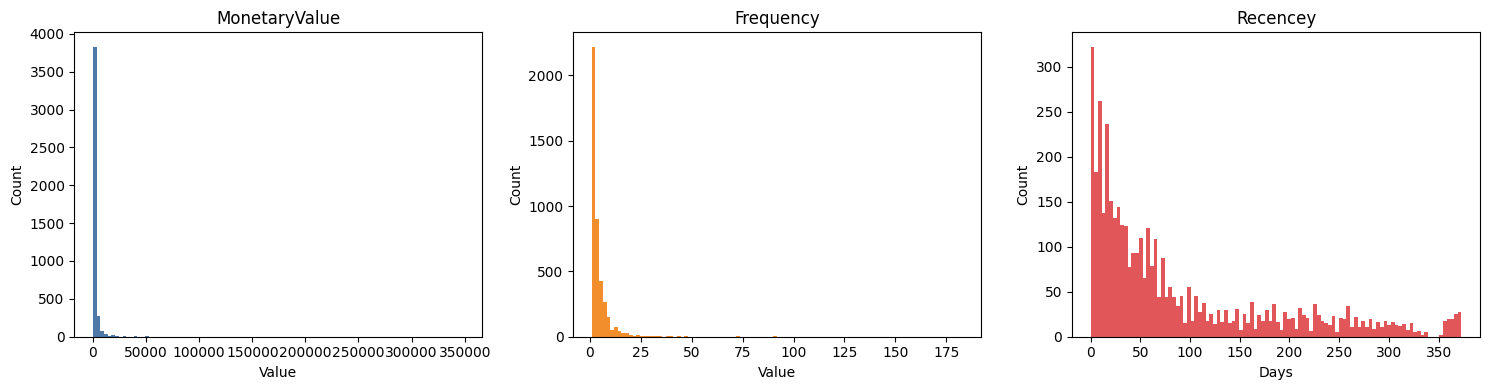

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(aggregated_df["MonetaryValue"], bins=100, color="#4e79a7")
axes[0].set_title("MonetaryValue")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Count")

axes[1].hist(aggregated_df["Frequency"], bins=100, color="#f28e2b")
axes[1].set_title("Frequency")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Count")

axes[2].hist(aggregated_df["Recencey"], bins=100, color="#e15759")
axes[2].set_title("Recencey")
axes[2].set_xlabel("Days")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [30]:
# Outliers handling

In [31]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)

frequency_outliers_df = aggregated_df[
    (aggregated_df["Frequency"] < F_Q1 - 1.5 * (F_Q3 - F_Q1)) |
    (aggregated_df["Frequency"] > F_Q3 + 1.5 * (F_Q3 - F_Q1))
]

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recencey
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14374.118014,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1091.440000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4328.435500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11652.410000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31383.976464,21.932937,NaN,26.589117


In [32]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)

monetary_outliers_df = aggregated_df[
    (aggregated_df["MonetaryValue"] < M_Q1 - 1.5 * (M_Q3 - M_Q1)) |
    (aggregated_df["MonetaryValue"] > M_Q3 + 1.5 * (M_Q3 - M_Q1))
]

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recencey
count,421.000000,421.000000,421.000000,421,421.000000
mean,15079.767221,12198.205667,17.161520,2010-11-09 13:16:23.087886080,30.000000
min,12357.000000,3788.210000,1.000000,2009-12-10 18:03:00,0.000000
25%,13599.000000,4590.530000,8.000000,2010-11-08 14:14:00,3.000000
50%,14936.000000,6171.070000,12.000000,2010-11-26 12:19:00,13.000000
75%,16656.000000,10300.980000,18.000000,2010-12-06 10:03:00,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1723.920744,25886.947522,19.765351,NaN,51.606109


In [33]:
non_outliers_df = aggregated_df[(~aggregated_df["MonetaryValue"].isin(monetary_outliers_df["MonetaryValue"])) &
                                (~aggregated_df["Frequency"].isin(frequency_outliers_df["Frequency"]))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recencey
count,3810.000000,3810.000000,3810.000000,3810,3810.000000
mean,15378.286089,880.964267,2.865092,2010-09-03 11:26:19.795275776,97.075591
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13913.500000,277.400000,1.000000,2010-07-08 15:37:30,22.000000
50%,15390.500000,581.125000,2.000000,2010-10-12 16:05:30,58.000000
75%,16856.750000,1256.622500,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3786.700000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.112036,815.589928,2.245889,NaN,98.099456


In [34]:
non_outliers_df.drop(columns=["LastInvoiceDate"],axis=1,inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_1080\420707583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df.drop(columns=["LastInvoiceDate"],axis=1,inplace=True)


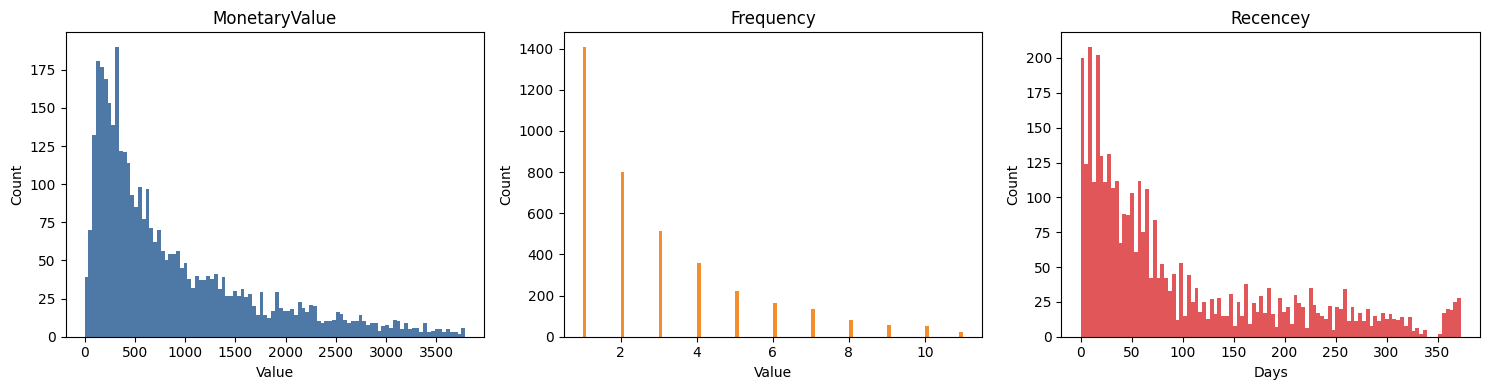

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(non_outliers_df["MonetaryValue"], bins=100, color="#4e79a7")
axes[0].set_title("MonetaryValue")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Count")

axes[1].hist(non_outliers_df["Frequency"], bins=100, color="#f28e2b")
axes[1].set_title("Frequency")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Count")

axes[2].hist(non_outliers_df["Recencey"], bins=100, color="#e15759")
axes[2].set_title("Recencey")
axes[2].set_xlabel("Days")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

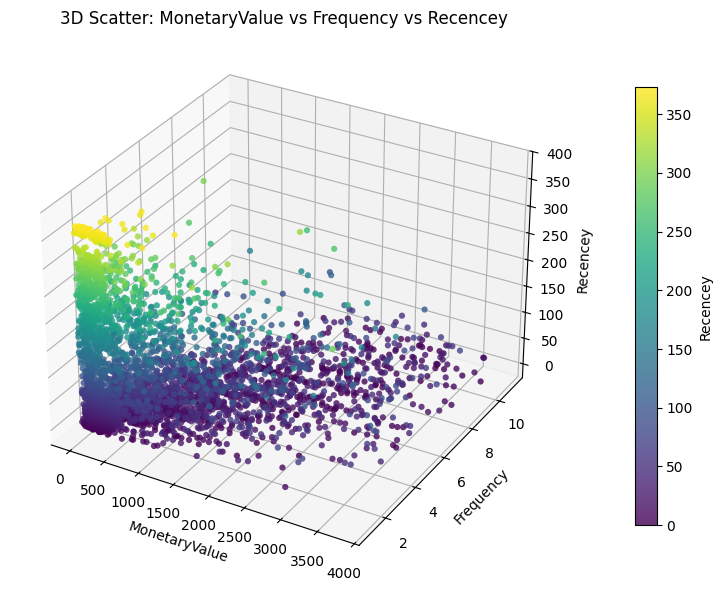

In [36]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

x = non_outliers_df["MonetaryValue"]
y = non_outliers_df["Frequency"]
z = non_outliers_df["Recencey"]

sc = ax.scatter(x, y, z, c=z, cmap="viridis", s=20, alpha=0.8, edgecolors="none")

ax.set_xlabel("MonetaryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recencey")
ax.set_title("3D Scatter: MonetaryValue vs Frequency vs Recencey")

cbar = plt.colorbar(sc, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label("Recencey")

plt.tight_layout()
plt.show()


In [37]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recencey"]])
scaled_data

array([[-0.87261704, -0.38523967,  0.68229934],
       [ 0.54244637, -0.38523967, -0.96930272],
       [-0.8090964 , -0.83055615, -0.24545244],
       ...,
       [-0.6179949 , -0.83055615,  2.01785409],
       [ 0.44815868, -0.38523967,  0.14196039],
       [ 1.73485643,  0.5053933 , -0.81637661]])

In [38]:
scaled_data = pd.DataFrame(scaled_data, columns=["MonetaryValue", "Frequency", "Recencey"])

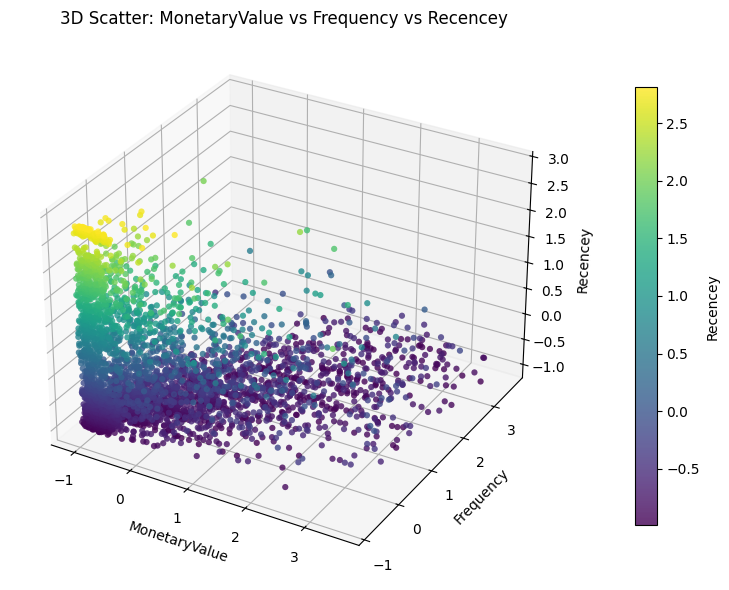

In [39]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

x = scaled_data["MonetaryValue"]
y = scaled_data["Frequency"]
z = scaled_data["Recencey"]

sc = ax.scatter(x, y, z, c=z, cmap="viridis", s=20, alpha=0.8, edgecolors="none")

ax.set_xlabel("MonetaryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recencey")
ax.set_title("3D Scatter: MonetaryValue vs Frequency vs Recencey")

cbar = plt.colorbar(sc, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label("Recencey")

plt.tight_layout()
plt.show()

### KMeans Clustering

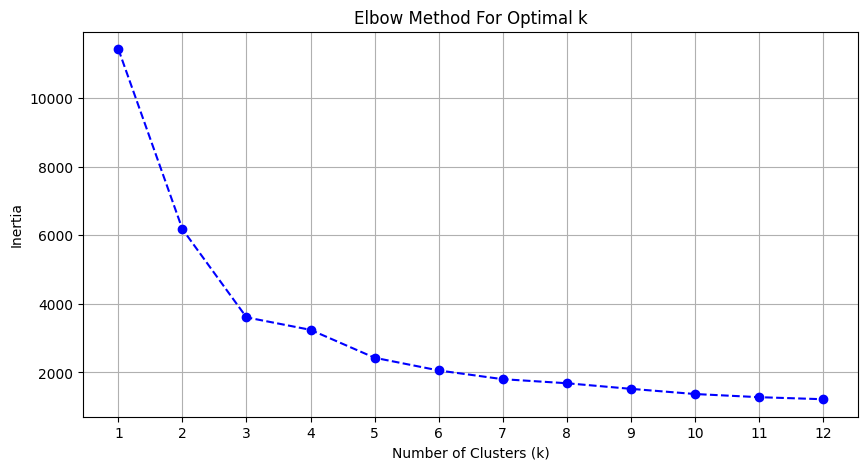

In [40]:
max_k = 12

inertia = []

k_values = range(1, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker="o", linestyle="--", color="b")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.grid(True)
plt.xticks(list(k_values))

plt.show()

-> Maybe 3 but i'm not sure enough

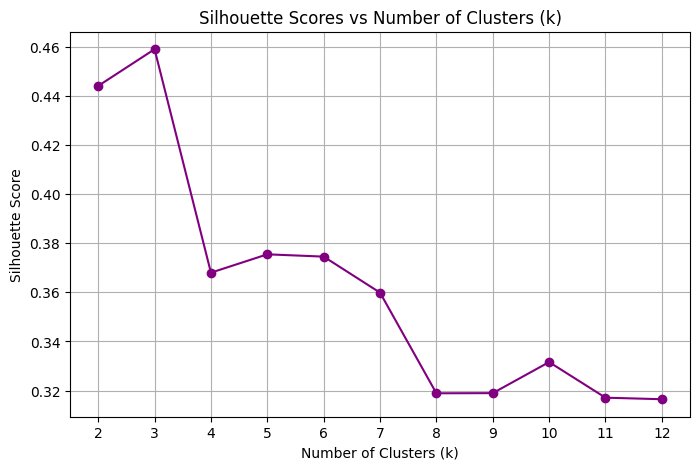

In [41]:
# Using Silhouette Score

silhouette_scores = {}
best_k = None
best_score = -1

k_range = range(2, max_k + 1)  
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    labels = km.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels, metric="euclidean")
    silhouette_scores[k] = score
    if score > best_score:
        best_k, best_score = k, score

plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker="o", color="purple")
plt.title("Silhouette Scores vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(list(k_range))
plt.show()


-> Chọn k=3 là tốt nhất

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data)
cluster_labels

array([1, 0, 0, ..., 1, 0, 2], dtype=int32)

In [43]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df.head(10)

C:\Users\Asus\AppData\Local\Temp\ipykernel_1080\956254053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,Recencey,Cluster
0,12346.0,169.36,2,164,1
1,12347.0,1323.32,2,2,0
2,12348.0,221.16,1,73,0
3,12349.0,2221.14,2,42,2
4,12351.0,300.93,1,10,0
5,12352.0,343.80,2,10,0
6,12353.0,317.76,1,43,0
7,12355.0,488.21,1,202,1
8,12356.0,3124.30,3,15,2
10,12358.0,2519.01,3,10,2


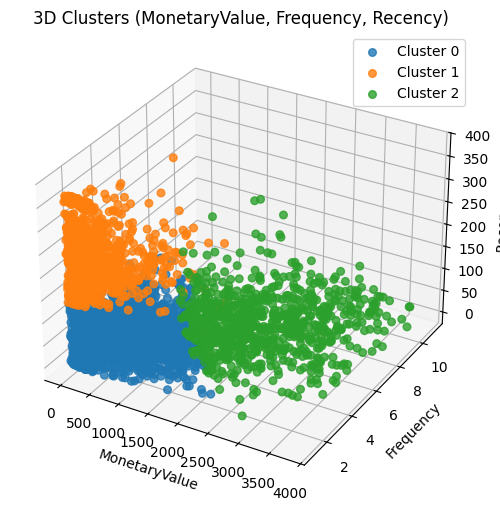

In [44]:
# 3D scatter using non_outliers_df with hue = Cluster on raw (unscaled) features
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

# Ensure expected columns exist (Recency is spelled 'Recencey' in df)
required_cols = ["MonetaryValue", "Frequency", "Recencey", "Cluster"]
missing = [c for c in required_cols if c not in non_outliers_df.columns]
if missing:
    raise KeyError(f"Missing columns in non_outliers_df: {missing}")

for lbl in sorted(non_outliers_df["Cluster"].unique()):
    sub = non_outliers_df[non_outliers_df["Cluster"] == lbl]
    ax.scatter(
        sub["MonetaryValue"],
        sub["Frequency"],
        sub["Recencey"],
        s=30,
        alpha=0.8,
        label=f"Cluster {lbl}",
    )

ax.set_title("3D Clusters (MonetaryValue, Frequency, Recency)")
ax.set_xlabel("MonetaryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.legend()
plt.show()


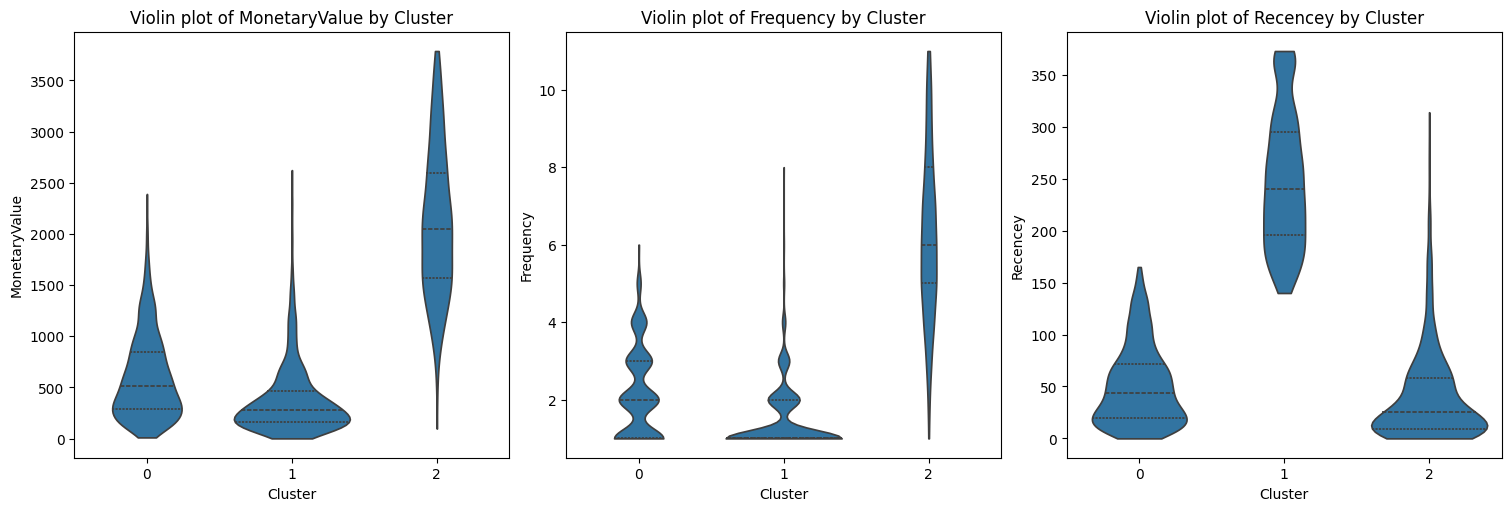

In [45]:
columns = ["MonetaryValue", "Frequency", "Recencey"]
fig, ax = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
for i, col in enumerate(columns):
    sns.violinplot(x="Cluster", y=col, data=non_outliers_df, ax=ax[i], inner="quartile", cut=0)
    ax[i].set_title(f"Violin plot of {col} by Cluster")
plt.show()


### Kết luận:

1. Cluster 0 - Những khách hàng bình thường  
Đặc điểm: chi tiêu trung bình (200 - 1000$), tần suất mua từ 2-5 lần và hay quay lại mua  
-> Action: tập trung khai thác sản phẩm họ hay dùng, tăng chất lượng phục vụ họ, giảm giá nhẹ kích thích mua  

2. Cluster 1 - Những khách hàng dễ rời bỏ  
Đặc điểm: chi ít tiền, tần suất mua rất thấp, lâu lâu mới mua  
-> Action: tăng tương tác với họ, chủ động thông báo các đợt siêu khuyến mãi, tìm hiểu sở thích của họ tập trung kích cầu mua tạo thế cạnh tranh

3. Cluster 3 - Những khách hàng cao cấp  
Đặc điểm: Chi nhiều tiền, tần suất mua lớn, rất hay quay lại mua  
-> Action: tạo thẻ tích điểm cho họ, thường xuyên tổ chức kỷ niệm các dịp đặc biệt, mời họ tham gia các hoạt động của công ty. 

## Outliers Analysis

In [46]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
overlap_indices

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=225)

In [47]:
monetary_only_outliers = monetary_outliers_df[~monetary_outliers_df.index.isin(frequency_outliers_df.index)]
frequency_only_outliers = frequency_outliers_df[~frequency_outliers_df.index.isin(monetary_outliers_df.index)]
monetary_and_frequency_outliers = monetary_outliers_df[monetary_outliers_df.index.isin(frequency_outliers_df.index)]

In [48]:
monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([
    monetary_only_outliers,
    frequency_only_outliers,
    monetary_and_frequency_outliers
])

C:\Users\Asus\AppData\Local\Temp\ipykernel_1080\3276197307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monetary_only_outliers["Cluster"] = -1
C:\Users\Asus\AppData\Local\Temp\ipykernel_1080\3276197307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequency_only_outliers["Cluster"] = -2
C:\Users\Asus\AppData\Local\Temp\ipykernel_1080\3276197307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [49]:
outlier_clusters_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recencey,Cluster
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,11,2010-12-01 10:03:00,8,-1
62,12433.0,7205.39,5,2010-12-08 16:49:00,1,-1
64,12435.0,6096.04,4,2010-11-08 10:07:00,31,-1
74,12454.0,12931.44,3,2010-11-09 10:09:00,30,-1
86,12474.0,4616.66,11,2010-11-26 12:19:00,13,-1
88,12476.0,6421.49,7,2010-11-07 15:34:00,32,-1


In [50]:
ax = plt.figure(figsize=(10, 6))
# Finally, append all outliers to the non_outliers_df

<Figure size 1000x600 with 0 Axes>